In [141]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [142]:
df = pd.read_excel('readyForModelisation2.xlsx',index_col=0)
pd.set_option('display.max_columns',88)

In [143]:
from sklearn.compose import make_column_selector
categorical=make_column_selector(dtype_exclude=np.number)
numerical=make_column_selector(dtype_include=np.number)
x=df[categorical]


In [144]:
df.replace(999,np.nan,inplace=True)
df.replace(11,np.nan,inplace=True)


In [152]:
StoreEval=df[['Info_Facility_Understand_numeric', 'Visit_Eval_numeric',
       'Store_Staff_numeric', 'Request_Comprehension_numeric',
       'Proposed_solution_in_Store_numeric',
       'privileged welcome as a business customer_numeric','Waiting_Time_in_Store',
        'Commercial_Eval','Time_Before_talk','commercial_understanding','commercial_solution','Visit_Eval.1',
            ]]


AppelEval=df[['Network_Quality','Rate_SOS',
       'Call_efficiency', 'Network_Coverage', 'Call_Voice_Quality',
       'Communication_Quality', 'Voice_Comm_Inside', 'Voice_Comm_Outside',
             'Rate_Conf_Call', 'Rate_Voice_Message']]


InternetEval=df[['Quality_Internet_Connection',
       'Mob_Internet_Accessibility', 'Navigation_Speed_Mobile',
       'Price_Quality_Mob_Int','Rate_Trans_Internet']]

RoamingEval=df[['Rate_Roaming_Service', 'Network_Accessibility', 'Quality_Voice',
       'Quality_Mobile_Internet', 'Info_cost_Roaming_Service',
       'Cost_Roaming_Service']]



In [155]:
# AppelEval=AppelEval[AppelEval.columns[AppelEval.isna().sum()/AppelEval.shape[0] < 0.9]]
AppelEval.drop(['Rate_SOS','Rate_Conf_Call','Rate_Voice_Message'],axis=1,inplace=True)

In [157]:
AppelEval

,Network_Quality,Call_efficiency,Network_Coverage,Call_Voice_Quality,Communication_Quality,Voice_Comm_Inside,Voice_Comm_Outside
0,7.0,2,9,9,9,9,9
1,7.0,4,7,7,7,7,7
2,5.0,4,6,6,5,5,5
3,7.0,4,7,7,7,7,7
4,8.0,3,8,8,8,8,8
...,...,...,...,...,...,...,...
1434,8.0,4,8,8,8,6,8
1435,3.0,2,1,1,1,1,1
1436,6.0,4,6,7,6,7,6
1437,6.0,3,6,5,6,6,6


In [94]:
df_clean=df.drop([  'Info_Facility_Understand_numeric', 'Visit_Eval_numeric',
       'Store_Staff_numeric', 'Request_Comprehension_numeric',
       'Proposed_solution_in_Store_numeric',
       'privileged welcome as a business customer_numeric','Waiting_Time_in_Store',
        'Commercial_Eval','Time_Before_talk','commercial_understanding','commercial_solution','Visit_Eval.1','Network_Quality','Rate_SOS',
       'Call_efficiency', 'Network_Coverage', 'Call_Voice_Quality',
       'Communication_Quality', 'Voice_Comm_Inside', 'Voice_Comm_Outside',
             'Rate_Conf_Call', 'Rate_Voice_Message','Quality_Internet_Connection',
       'Mob_Internet_Accessibility', 'Navigation_Speed_Mobile',
       'Price_Quality_Mob_Int','Rate_Trans_Internet','Rate_Roaming_Service', 'Network_Accessibility', 'Quality_Voice',
       'Quality_Mobile_Internet', 'Info_cost_Roaming_Service',
       'Cost_Roaming_Service'],axis=1,errors='ignore')

In [95]:
df_clean.shape

(1439, 37)

In [158]:
# df_clean['Appel_score']=AppelEval.mean(axis=1)
# df_clean['Roamnig_score']=RoamingEval.mean(axis=1)
# df_clean['Internet_score']=InternetEval.mean(axis=1)
# df_clean['Store_score']=StoreEval.mean(axis=1)

# globall=df_clean[['Appel_score','Roamnig_score','Internet_score','Store_score']]
# df_clean['note']=globall.mean(axis=0)
# #---------------------------------------------------
AppelEval['Appel_score']=AppelEval.mean(axis=1)
# RoamingEval['Roamnig_score']=RoamingEval.mean(axis=1)
# InternetEval['Internet_score']=InternetEval.mean(axis=1)
# StoreEval['store_score']=StoreEval.mean(axis=1)


In [159]:
AppelEval

,Network_Quality,Call_efficiency,Network_Coverage,Call_Voice_Quality,Communication_Quality,Voice_Comm_Inside,Voice_Comm_Outside,Appel_score
0,7.0,2,9,9,9,9,9,7.714286
1,7.0,4,7,7,7,7,7,6.571429
2,5.0,4,6,6,5,5,5,5.142857
3,7.0,4,7,7,7,7,7,6.571429
4,8.0,3,8,8,8,8,8,7.285714
...,...,...,...,...,...,...,...,...
1434,8.0,4,8,8,8,6,8,7.142857
1435,3.0,2,1,1,1,1,1,1.428571
1436,6.0,4,6,7,6,7,6,6.000000
1437,6.0,3,6,5,6,6,6,5.428571


In [97]:
StoreEval.dropna()

,Info_Facility_Understand_numeric,Visit_Eval_numeric,Store_Staff_numeric,Request_Comprehension_numeric,Proposed_solution_in_Store_numeric,privileged welcome as a business customer_numeric,Waiting_Time_in_Store,Commercial_Eval,Time_Before_talk,commercial_understanding,commercial_solution,Visit_Eval.1,store_score
43,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.416667
251,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.416667
587,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.416667
795,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.416667
1227,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.416667
1435,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.416667


## Dummies 

In [160]:
Y=AppelEval['Appel_score'] # mrigla
Y1=df_clean['Roamnig_score'] #mrigla 
Y2=df_clean['Internet_score'] #courbe kheyba 
Y3=df_clean['Store_score']  #nan

In [161]:
status = pd.get_dummies(x,drop_first=True)

In [100]:
df_clean= pd.concat([Y,Y1,Y2,Y3,status],axis=1)
df.shape

(1439, 56)

In [162]:
status

,city_SFAX,city_TUNIS,Sect_Comp_Assurances,Sect_Comp_Banque,Sect_Comp_Commerce,Sect_Comp_INFORMATIQUE,Sect_Comp_Industrie,Sect_Comp_Santé,Sect_Comp_Services,Sect_Comp_Tourisme,Opert_Princ_Orange,Opert_Princ_Tunisie Télécom,Opert_Period_2 ans à moins de 3 ans,Opert_Period_3 ans ou plus,Opert_Period_3 mois à moins de 6 mois,Opert_Period_6 mois à moins de 12 mois,Opert_Period_Il y a moins de 3 mois,Abonnement_Orange_ Certains ou tous les employés ont leur propre abonnement mobile et ne se font pas rembourser du tout leur facture par votre entreprise,Abonnement_Orange_ Certains ou tous les employés ont souscrit leur propre abonnement mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise,Abonnement_Orange_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.,Abonnement_Orange_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise,Abonnement_Ooredoo_ Certains ou tous les employés ont leur propre abonnement mobile et ne se font pas rembourser du tout leur facture par votre entreprise,Abonnement_Ooredoo_ Certains ou tous les employés ont souscrit leur propre abonnement mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise,Abonnement_Ooredoo_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.,Abonnement_Ooredoo_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise,Abonnement_Telecom_ Certains ou tous les employés ont leur propre abonnement mobile et ne se font pas rembourser du tout leur facture par votre entreprise,Abonnement_Telecom_ Certains ou tous les employés ont souscrit leur propre abonnement mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise,Abonnement_Telecom_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.,Abonnement_Telecom_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise,Opert_Princ_Type_Offer_Offre mobile postpayé,Opert_Princ_Type_Offer_Offre mobile postpayée avec tarif préférentiel intra-flotte,Opert_Princ_Type_Offer_Offre mobile prépayée,Opert_Princ_Type_Offer_Offre mobile prépayée avec tarif préférentiel intra-flotte,Visite_Date_3 mois à moins de 6 mois,Visite_Date_6 mois à moins de 12 mois,Visite_Date_Il y a moins de 3 mois,Operator_Name_Ooredoo,Operator_Name_Orange,Operator_Name_TunisieTélécom,Operator_Name_unknown
0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
1,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
2,0,1,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
3,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
4,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1434,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1435,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1436,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1437,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1


## Scaling

In [101]:
#defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                            
                                              
# applying normalize ( ) to all columns 
df_clean = df_clean.apply(normalize) 

#   Splitting Data into Training and Testing Sets

In [104]:
# Putting feature variable to X
X = df_clean[[ 'city_SFAX', 'city_TUNIS',
       'Sect_Comp_Assurances', 'Sect_Comp_Banque', 'Sect_Comp_Commerce',
        'Sect_Comp_Industrie', 'Sect_Comp_Santé',
       'Sect_Comp_Services', 'Sect_Comp_Tourisme', 'Opert_Princ_Orange',
       'Opert_Princ_Tunisie Télécom', 'Opert_Period_2 ans à moins de 3 ans',
       'Opert_Period_3 ans ou plus', 
       'Opert_Period_6 mois à moins de 12 mois',
       
       'Abonnement_Orange_ Certains ou tous les employés ont leur propre abonnement  mobile et ne se font pas rembourser du tout leur facture par votre entreprise',
       'Abonnement_Orange_ Certains ou tous les employés ont souscrit leur propre abonnement  mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise',
       'Abonnement_Orange_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.',
       'Abonnement_Orange_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise',
       'Abonnement_Ooredoo_ Certains ou tous les employés ont leur propre abonnement  mobile et ne se font pas rembourser du tout leur facture par votre entreprise',
       
       'Abonnement_Ooredoo_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.',
       'Abonnement_Ooredoo_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise',
  
       'Abonnement_Telecom_ Certains ou tous les employés ont souscrit leur propre abonnement  mobile mais se font rembourser en partie ou en totalité leur facture par l’entreprise',
       'Abonnement_Telecom_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en intégralité par l’entreprise.',
       'Abonnement_Telecom_ Les abonnements mobiles sont fournis par l’entreprise à certains ou à tous les employés et les factures sont payées en partie par l’entreprise',
       'Opert_Princ_Type_Offer_Offre mobile postpayé',
       'Opert_Princ_Type_Offer_Offre mobile postpayée avec tarif préférentiel intra-flotte',
       'Opert_Princ_Type_Offer_Offre mobile prépayée',
       'Opert_Princ_Type_Offer_Offre mobile prépayée avec tarif préférentiel intra-flotte',
       ]]


In [70]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X_train,y_train.round())
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  
Xbest_name=featureScores.sort_values(by=['Score'],ascending=False).head(10).Specs.to_list()

In [105]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
X_train, X_test, y_train, y_test = train_test_split(X, Y, train_size=0.8 , random_state=43)
def evaluate(model):
   
    model.fit(X_train,y_train)
    ypred=model.predict(X_test)
    explained_variance=metrics.explained_variance_score(y_test, ypred)
    mean_absolute_error=metrics.mean_absolute_error(y_test, ypred)
    mse=metrics.mean_squared_error(y_test, ypred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_test, ypred)
    median_absolute_error=metrics.median_absolute_error(y_test, ypred)
    r2=metrics.r2_score(y_test, ypred)
    print(model.__class__)
    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.regplot(y_test,ypred)
    c = [i for i in range(1,len(y_test)+1,1)]
    plt.subplot(1,2,2)
    plt.plot(c,y_test, color="blue", linewidth=2.5, linestyle="-")
    plt.plot(c,ypred, color="red",  linewidth=2.5, linestyle="-") 
    plt.suptitle('Actual and Predicted', fontsize=20)             
    plt.xlabel('Test Set', fontsize=18)                           
    plt.ylabel(Y.name, fontsize=16) 
    plt.show()

# Random forest

<class 'sklearn.ensemble._forest.RandomForestRegressor'>
explained_variance:  0.6563
mean_squared_log_error:  0.0078
r2:  0.6555
MAE:  0.4404
MSE:  0.3631
RMSE:  0.6025


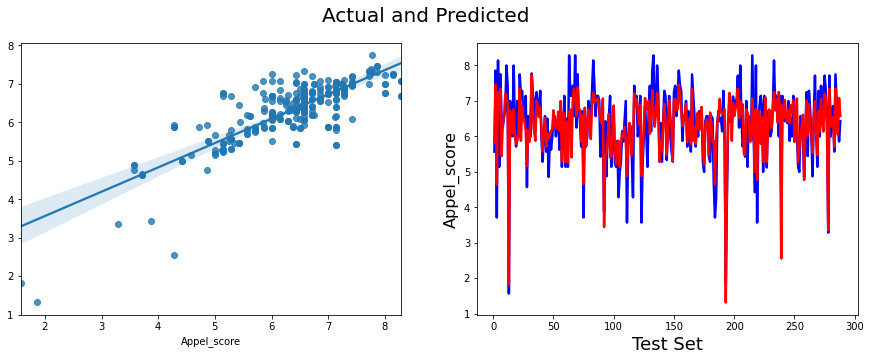

In [195]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV 
 # create regressor object
regressor = RandomForestRegressor(n_estimators = 100, random_state = 0)
param_grid = { 
    'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    
}
grid_regressor = GridSearchCV(estimator=regressor, param_grid=param_grid, cv= 5)
grid_regressor.fit(X_train, y_train)
regressor=grid_regressor.best_estimator_
model=regressor
evaluate(model)

# StackingRegressor

<class 'sklearn.ensemble._stacking.StackingRegressor'>
explained_variance:  0.2217
mean_squared_log_error:  0.0194
r2:  0.2216
MAE:  0.6859
MSE:  0.8204
RMSE:  0.9058


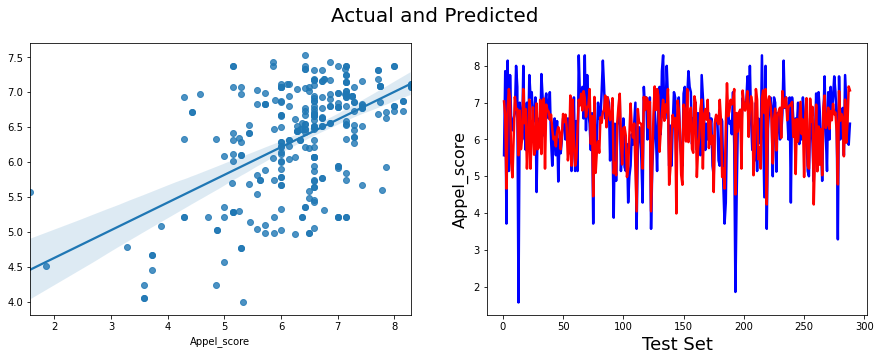

In [106]:
from sklearn.linear_model import RidgeCV
from sklearn.svm import LinearSVR
from sklearn.ensemble import StackingRegressor
estimators = [
    ('lr', RidgeCV()),
    ('svr', LinearSVR(random_state=42))
]
Stackingreg = StackingRegressor(
    estimators=estimators,
    final_estimator=RandomForestRegressor(n_estimators=10,
                                          random_state=42)
)
evaluate(Stackingreg)

# ExtraTreesRegressor

<class 'sklearn.ensemble._forest.ExtraTreesRegressor'>
explained_variance:  0.6509
mean_squared_log_error:  0.0079
r2:  0.6493
MAE:  0.3882
MSE:  0.3696
RMSE:  0.608


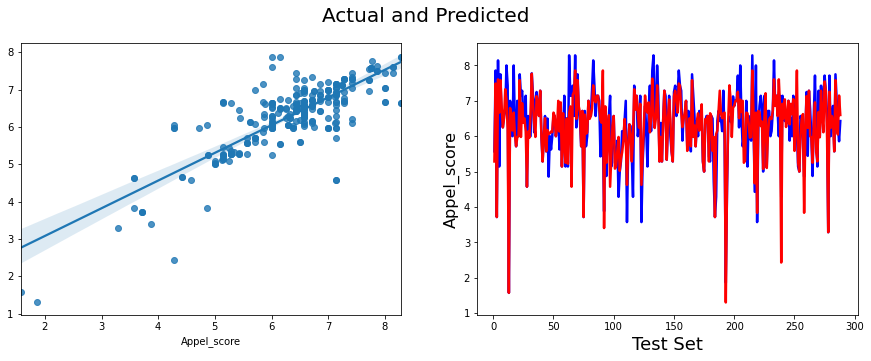

AttributeError: 'ExtraTreesRegressor' object has no attribute 'best_score_'

In [196]:
from sklearn.ensemble import ExtraTreesRegressor
ext=ExtraTreesRegressor()
evaluate(ext)
ext.best_score_

# BaggingRegressor

In [174]:
from sklearn.ensemble import BaggingRegressor
bag=BaggingRegressor(random_state=42)
# evaluate(bag)
bag.fit(X_train,y_train)
y_pred=bag.predict(X_test)
bag.score(X_test, y_test)

0.6494765130613276

# VotingRegressor

<class 'sklearn.ensemble._voting.VotingRegressor'>
explained_variance:  0.5736
mean_squared_log_error:  0.0108
r2:  0.5715
MAE:  0.5233
MSE:  0.4517
RMSE:  0.6721


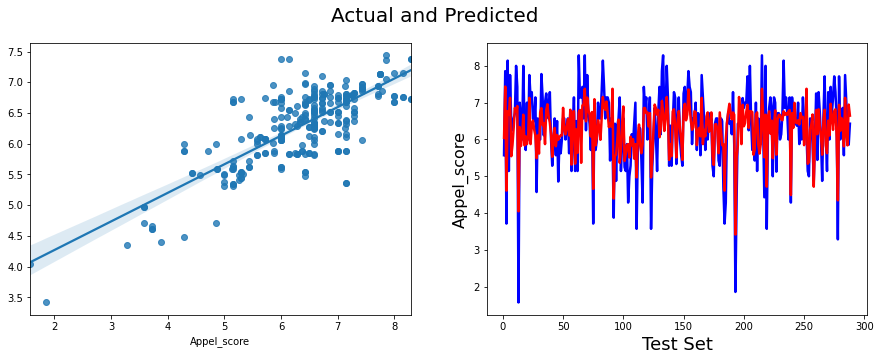

In [109]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
r1 = LinearRegression()
r2 = RandomForestRegressor(n_estimators=10, random_state=1)
vot=VotingRegressor([('lr', r1), ('rf', r2)])
evaluate(vot)

# KNeighborsRegressor

In [110]:

from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import GridSearchCV
parameters = {'n_neighbors': (1,99, 1),
    'leaf_size': (20,40,1),
    'p': (1,2),
    'weights': ('uniform', 'distance'),
    'metric': ('minkowski', 'chebyshev')}

knn = KNeighborsRegressor()
grid = GridSearchCV(knn, parameters)

In [111]:
grid.fit(X_train,y_train)
grid.best_estimator_

KNeighborsRegressor(leaf_size=40, n_neighbors=99, p=1, weights='distance')

<class 'sklearn.neighbors._regression.KNeighborsRegressor'>
explained_variance:  0.6319
mean_squared_log_error:  0.0082
r2:  0.6292
MAE:  0.4095
MSE:  0.3909
RMSE:  0.6252


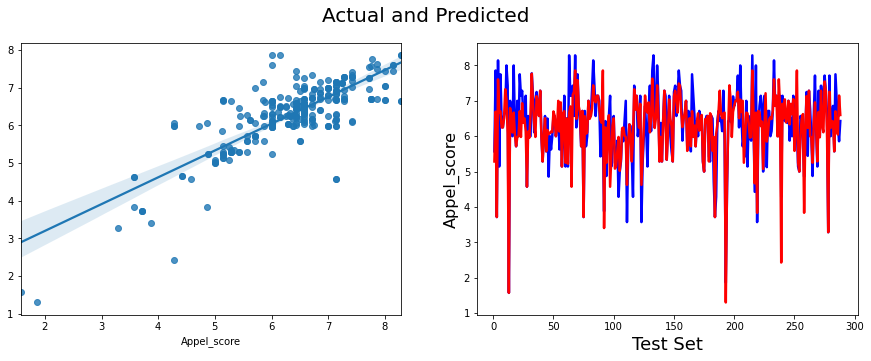

In [112]:
evaluate(grid.best_estimator_)

In [187]:
from sklearn.ensemble import RandomForestRegressor
regr = RandomForestRegressor(max_depth=12, random_state=0)
regr.fit(X_train, y_train)

RandomForestRegressor(max_depth=12, random_state=0)

In [188]:
regr.be

0.6630239611041009

In [191]:
feature_imp = pd.Series(regr.feature_importances_).sort_values(ascending=False)
feature_imp

16    0.095234
4     0.088141
9     0.079789
5     0.075930
22    0.060998
26    0.054611
19    0.053610
11    0.051592
20    0.050726
10    0.049759
7     0.049543
12    0.048901
14    0.039317
24    0.028736
18    0.026379
27    0.023752
13    0.019917
3     0.018083
6     0.017734
0     0.011831
8     0.011006
1     0.010141
15    0.008328
23    0.008055
17    0.006495
25    0.005414
21    0.004603
2     0.001375
dtype: float64

In [194]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
x=feature_imp.head(10)
sns.barplot(x=x, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

ValueError: Length of passed values is 28, index implies 10.